In [ ]:
import warnings
warnings.filterwarnings("ignore")
import librosa 
from scipy.io import wavfile as wav
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

## Extract Features for every file (Mel-Frequency Cepstral Coefficients (MFCC))

In [2]:
max_pad_len = 1000

def extract_features(file_name):
   
    try:
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        pad_width = max_pad_len - mfccs.shape[1]
        mfccs = np.pad(mfccs, pad_width=((0, 0), (0, pad_width)), mode='constant')
        
    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        return None 
    
    return mfccs

In [3]:
df = pd.read_csv('Audios_After_Filter.csv', index_col=0)
df.shape

(52362, 2)

In [4]:
df.head()

,name,class_name
0,z6B2GrcqUvM__U__S0---0176.100-0192.090.wav,Korean
1,tO1xkcNbsB4__U__S103---0473.100-0483.500.wav,Korean
2,fqv7wkunopk__U__S100---1854.210-1866.660.wav,Korean
3,Hfj6C893PMc__U__S0---0382.790-0401.400.wav,Korean
4,T9dfFfeFJlA__U__S0---0275.200-0288.980.wav,Korean


In [5]:
df['class_name'].value_counts()

Korean      11073
Arabic       9216
Turkish      8838
English      8533
Japanese     8035
Spanish      6667
Name: class_name, dtype: int64

In [6]:
#create unique list of names
UniqueNames = df.class_name.unique()

#create a data frame dictionary to store your data frames
DataFrameDict = {elem : pd.DataFrame() for elem in UniqueNames}

for key in DataFrameDict.keys():
    DataFrameDict[key] = df[:][df.class_name == key]

In [7]:
featuresdfKoN = DataFrameDict['Korean'].head(8838)
featuresdfArN = DataFrameDict['Arabic'].head(8838)
featuresdfEnN = DataFrameDict['English']
featuresdfJpN = DataFrameDict['Japanese']
featuresdfTkN = DataFrameDict['Turkish']

In [8]:
# English
fulldatasetpath = 'Audios/en/'

metadata = featuresdfEnN #.head(10)

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features(file_name)
    features.append([data, class_label])
    
# Convert into a Panda dataframe 
featuresdfEn = pd.DataFrame(features, columns=['feature','class_label'])
print('Finished feature extraction from ', len(featuresdfEn), 'files') 
featuresdfEn.head()

Finished feature extraction from  8533 files


,feature,class_label
0,"[[-236.3834, -240.74864, -286.81854, -335.9199...",English
1,"[[-395.29422, -360.03094, -356.22986, -353.719...",English
2,"[[-579.48895, -560.9052, -566.01465, -563.8545...",English
3,"[[-525.4768, -499.51846, -497.19257, -494.4048...",English
4,"[[-354.51477, -338.15552, -345.86176, -348.245...",English


In [9]:
# Arabic
fulldatasetpath = 'Audios/ar/'

metadata = featuresdfArN #.head(10)

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features(file_name)
    features.append([data, class_label])
    
# Convert into a Panda dataframe 
featuresdfAr = pd.DataFrame(features, columns=['feature','class_label'])
print('Finished feature extraction from ', len(featuresdfAr), 'files') 
featuresdfAr.head()

Finished feature extraction from  8838 files


,feature,class_label
0,"[[-445.52887, -431.417, -425.64957, -425.60025...",Arabic
1,"[[-519.2706, -514.4043, -514.449, -515.2433, -...",Arabic
2,"[[-526.5613, -489.97736, -480.0966, -470.34756...",Arabic
3,"[[-291.93204, -273.22742, -275.80392, -269.832...",Arabic
4,"[[-70.144714, -103.15895, -116.857635, -108.52...",Arabic


In [10]:
# Korean
fulldatasetpath = 'Audios/ko/'

metadata = featuresdfKoN #.head(10)

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features(file_name)
    features.append([data, class_label])
    
# Convert into a Panda dataframe 
featuresdfKo = pd.DataFrame(features, columns=['feature','class_label'])
print('Finished feature extraction from ', len(featuresdfKo), 'files') 
featuresdfKo.head()

Finished feature extraction from  8838 files


,feature,class_label
0,"[[-337.1428, -315.31598, -320.33966, -326.1484...",Korean
1,"[[-411.41278, -387.64124, -389.1636, -385.4904...",Korean
2,"[[-649.7472, -637.6825, -638.4699, -640.13654,...",Korean
3,"[[-346.15674, -287.54584, -290.74844, -323.012...",Korean
4,"[[-370.32172, -369.05612, -410.87262, -433.151...",Korean


In [11]:
# Turkish
fulldatasetpath = 'Audios/tr/'

metadata = featuresdfTkN #.head(10)

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features(file_name)
    features.append([data, class_label])
    
# Convert into a Panda dataframe 
featuresdfTk = pd.DataFrame(features, columns=['feature','class_label'])
print('Finished feature extraction from ', len(featuresdfTk), 'files') 
featuresdfTk.head()

Finished feature extraction from  8838 files


,feature,class_label
0,"[[-444.94214, -422.73825, -420.40704, -417.381...",Turkish
1,"[[-431.13245, -420.98282, -427.18054, -429.920...",Turkish
2,"[[-164.088, -171.36533, -234.37628, -301.43088...",Turkish
3,"[[-525.5991, -495.4286, -494.38278, -497.94498...",Turkish
4,"[[-283.20184, -257.3172, -263.4428, -269.31204...",Turkish


In [12]:
# Japanese
fulldatasetpath = 'Audios/ja/'

metadata = featuresdfJpN #.head(10)

features = []

# Iterate through each sound file and extract the features 
for index, row in metadata.iterrows():
    file_name = os.path.join(os.path.abspath(fulldatasetpath),str(row["name"]))
    class_label = row["class_name"]
    data = extract_features(file_name)
    features.append([data, class_label])
    
# Convert into a Panda dataframe 
featuresdfJp = pd.DataFrame(features, columns=['feature','class_label'])
print('Finished feature extraction from ', len(featuresdfJp), 'files') 
featuresdfJp.head()

Finished feature extraction from  8035 files


,feature,class_label
0,"[[-482.03732, -458.39206, -461.35205, -469.093...",Japanese
1,"[[-490.49344, -501.16165, -435.78598, -315.744...",Japanese
2,"[[-662.52136, -662.52136, -662.52136, -662.521...",Japanese
3,"[[-426.85135, -400.93704, -401.8635, -400.2144...",Japanese
4,"[[-651.9767, -651.9767, -651.9767, -651.9767, ...",Japanese


## Prepare data for training

Use OneHot Encoder to encode the categorical text data (Languages), ...

In [13]:
featuresdf = pd.concat([featuresdfEn, featuresdfAr, featuresdfJp, featuresdfKo, featuresdfTk], ignore_index=True)
featuresdf.head()

,feature,class_label
0,"[[-236.3834, -240.74864, -286.81854, -335.9199...",English
1,"[[-395.29422, -360.03094, -356.22986, -353.719...",English
2,"[[-579.48895, -560.9052, -566.01465, -563.8545...",English
3,"[[-525.4768, -499.51846, -497.19257, -494.4048...",English
4,"[[-354.51477, -338.15552, -345.86176, -348.245...",English


In [14]:
featuresdf['class_label'].value_counts()

Arabic      8838
Korean      8838
Turkish     8838
English     8533
Japanese    8035
Name: class_label, dtype: int64

In [15]:
# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())

# Encode the classification labels
ohe = OneHotEncoder()
# yy = ohe.fit_transform(y)
yy = ohe.fit_transform(featuresdf.class_label.values.reshape(-1,1)).toarray()

In [30]:
ohe.categories_

[array(['Arabic', 'English', 'Japanese', 'Korean', 'Turkish'], dtype=object)]

# Split the dataset

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.3, random_state = 42) # test 30% train 70%

# Creating & compiling the model 

In [34]:
# !pip install tensorflow

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'


num_rows = 40 # is the number of MFCC's Features
num_columns = max_pad_len
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1] 


# Model creation
model = Sequential()

# Convnet Layer:
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(num_rows, num_columns, num_channels), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(GlobalAveragePooling2D())

# Classification Layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

# Model compiling
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 

# Model summary 
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 39, 999, 16)       80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 499, 16)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 499, 16)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 18, 498, 32)       2080      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 9, 249, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 9, 249, 32)        0

In [18]:
num_rows = 40 # is the number of MFCC's Features
num_columns = max_pad_len
num_channels = 1

x_train = x_train.reshape(x_train.shape[0], num_rows, num_columns, num_channels)
x_test = x_test.reshape(x_test.shape[0], num_rows, num_columns, num_channels)

num_labels = yy.shape[1] 


# Model Training

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

epochs_num = 200
batch_size_num = 32

checkpointer = ModelCheckpoint(filepath='best_models/model_CNN.hdf5', verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=batch_size_num, epochs=epochs_num, validation_data=(x_test, y_test), callbacks=[checkpointer])


duration = datetime.now() - start
print("Training completed in time: ", duration)



Epoch 1/200
943/943 [==============================] - ETA: 0s - loss: 0.4376 - accuracy: 0.8402
Epoch 1: val_loss improved from inf to 0.33205, saving model to best_models/model_CNN.hdf5
943/943 [==============================] - 420s 445ms/step - loss: 0.4376 - accuracy: 0.8402 - val_loss: 0.3321 - val_accuracy: 0.8895
Epoch 2/200
943/943 [==============================] - ETA: 0s - loss: 0.4322 - accuracy: 0.8407
Epoch 2: val_loss improved from 0.33205 to 0.32018, saving model to best_models/model_CNN.hdf5
943/943 [==============================] - 416s 441ms/step - loss: 0.4322 - accuracy: 0.8407 - val_loss: 0.3202 - val_accuracy: 0.8883
Epoch 3/200
943/943 [==============================] - ETA: 0s - loss: 0.4257 - accuracy: 0.8443
Epoch 3: val_loss did not improve from 0.32018
943/943 [==============================] - 422s 447ms/step - loss: 0.4257 - accuracy: 0.8443 - val_loss: 0.3305 - val_accuracy: 0.8836
Epoch 4/200
943/943 [==============================] - ETA: 0s - loss: 

943/943 [==============================] - ETA: 0s - loss: 0.3390 - accuracy: 0.8776
Epoch 29: val_loss did not improve from 0.23431
943/943 [==============================] - 432s 458ms/step - loss: 0.3390 - accuracy: 0.8776 - val_loss: 0.2575 - val_accuracy: 0.9121
Epoch 30/200
943/943 [==============================] - ETA: 0s - loss: 0.3353 - accuracy: 0.8780
Epoch 30: val_loss did not improve from 0.23431
943/943 [==============================] - 432s 458ms/step - loss: 0.3353 - accuracy: 0.8780 - val_loss: 0.2571 - val_accuracy: 0.9130
Epoch 31/200
943/943 [==============================] - ETA: 0s - loss: 0.3372 - accuracy: 0.8756
Epoch 31: val_loss did not improve from 0.23431
943/943 [==============================] - 449s 476ms/step - loss: 0.3372 - accuracy: 0.8756 - val_loss: 0.2451 - val_accuracy: 0.9163
Epoch 32/200
943/943 [==============================] - ETA: 0s - loss: 0.3340 - accuracy: 0.8785
Epoch 32: val_loss did not improve from 0.23431
943/943 [===============

Epoch 58/200
943/943 [==============================] - ETA: 0s - loss: 0.3030 - accuracy: 0.8902
Epoch 58: val_loss did not improve from 0.21798
943/943 [==============================] - 391s 415ms/step - loss: 0.3030 - accuracy: 0.8902 - val_loss: 0.2276 - val_accuracy: 0.9177
Epoch 59/200
943/943 [==============================] - ETA: 0s - loss: 0.2969 - accuracy: 0.8925
Epoch 59: val_loss did not improve from 0.21798
943/943 [==============================] - 395s 419ms/step - loss: 0.2969 - accuracy: 0.8925 - val_loss: 0.3069 - val_accuracy: 0.8894
Epoch 60/200
943/943 [==============================] - ETA: 0s - loss: 0.3080 - accuracy: 0.8887
Epoch 60: val_loss did not improve from 0.21798
943/943 [==============================] - 402s 426ms/step - loss: 0.3080 - accuracy: 0.8887 - val_loss: 0.2591 - val_accuracy: 0.9071
Epoch 61/200
943/943 [==============================] - ETA: 0s - loss: 0.2917 - accuracy: 0.8940
Epoch 61: val_loss improved from 0.21798 to 0.21483, saving

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

epochs_num = 112
batch_size_num = 32

checkpointer = ModelCheckpoint(filepath='best_models/model_CNN.hdf5', verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=batch_size_num, epochs=epochs_num, validation_data=(x_test, y_test), callbacks=[checkpointer])


duration = datetime.now() - start
print("Training completed in time: ", duration)



Epoch 1/112
943/943 [==============================] - ETA: 0s - loss: 0.2972 - accuracy: 0.8922
Epoch 1: val_loss improved from inf to 0.24307, saving model to best_models/model_CNN.hdf5
943/943 [==============================] - 528s 559ms/step - loss: 0.2972 - accuracy: 0.8922 - val_loss: 0.2431 - val_accuracy: 0.9133
Epoch 2/112
943/943 [==============================] - ETA: 0s - loss: 0.2922 - accuracy: 0.8953
Epoch 2: val_loss improved from 0.24307 to 0.22090, saving model to best_models/model_CNN.hdf5
943/943 [==============================] - 491s 520ms/step - loss: 0.2922 - accuracy: 0.8953 - val_loss: 0.2209 - val_accuracy: 0.9236
Epoch 3/112
943/943 [==============================] - ETA: 0s - loss: 0.2929 - accuracy: 0.8943
Epoch 3: val_loss did not improve from 0.22090
943/943 [==============================] - 498s 528ms/step - loss: 0.2929 - accuracy: 0.8943 - val_loss: 0.2538 - val_accuracy: 0.9103
Epoch 4/112
943/943 [==============================] - ETA: 0s - loss: 

943/943 [==============================] - 457s 485ms/step - loss: 0.2769 - accuracy: 0.8996 - val_loss: 0.1975 - val_accuracy: 0.9340
Epoch 30/112
943/943 [==============================] - ETA: 0s - loss: 0.2753 - accuracy: 0.9002
Epoch 30: val_loss did not improve from 0.19748
943/943 [==============================] - 453s 480ms/step - loss: 0.2753 - accuracy: 0.9002 - val_loss: 0.2106 - val_accuracy: 0.9273
Epoch 31/112
943/943 [==============================] - ETA: 0s - loss: 0.2792 - accuracy: 0.8981
Epoch 31: val_loss did not improve from 0.19748
943/943 [==============================] - 483s 512ms/step - loss: 0.2792 - accuracy: 0.8981 - val_loss: 0.2144 - val_accuracy: 0.9248
Epoch 32/112
943/943 [==============================] - ETA: 0s - loss: 0.2748 - accuracy: 0.9006
Epoch 32: val_loss did not improve from 0.19748
943/943 [==============================] - 450s 478ms/step - loss: 0.2748 - accuracy: 0.9006 - val_loss: 0.2221 - val_accuracy: 0.9213
Epoch 33/112
943/943 [

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

epochs_num = 71
batch_size_num = 32

checkpointer = ModelCheckpoint(filepath='best_models/model_CNN.hdf5', verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=batch_size_num, epochs=epochs_num, validation_data=(x_test, y_test), callbacks=[checkpointer])


duration = datetime.now() - start
print("Training completed in time: ", duration)



Epoch 1/71
943/943 [==============================] - ETA: 0s - loss: 0.2655 - accuracy: 0.9048
Epoch 1: val_loss improved from inf to 0.21522, saving model to best_models/model_CNN.hdf5
943/943 [==============================] - 471s 498ms/step - loss: 0.2655 - accuracy: 0.9048 - val_loss: 0.2152 - val_accuracy: 0.9243
Epoch 2/71
943/943 [==============================] - ETA: 0s - loss: 0.2749 - accuracy: 0.9021
Epoch 2: val_loss improved from 0.21522 to 0.20391, saving model to best_models/model_CNN.hdf5
943/943 [==============================] - 456s 483ms/step - loss: 0.2749 - accuracy: 0.9021 - val_loss: 0.2039 - val_accuracy: 0.9261
Epoch 3/71
943/943 [==============================] - ETA: 0s - loss: 0.2731 - accuracy: 0.9011
Epoch 3: val_loss did not improve from 0.20391
943/943 [==============================] - 455s 482ms/step - loss: 0.2731 - accuracy: 0.9011 - val_loss: 0.2081 - val_accuracy: 0.9272
Epoch 4/71
943/943 [==============================] - ETA: 0s - loss: 0.27

In [37]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

epochs_num = 47
batch_size_num = 32

checkpointer = ModelCheckpoint(filepath='best_models/model_CNN.hdf5', verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=batch_size_num, epochs=epochs_num, validation_data=(x_test, y_test), callbacks=[checkpointer])


duration = datetime.now() - start
print("Training completed in time: ", duration)



Epoch 1/47
943/943 [==============================] - ETA: 0s - loss: 0.2606 - accuracy: 0.9050
Epoch 1: val_loss improved from inf to 0.20791, saving model to best_models/model_CNN.hdf5
943/943 [==============================] - 408s 433ms/step - loss: 0.2606 - accuracy: 0.9050 - val_loss: 0.2079 - val_accuracy: 0.9285
Epoch 2/47
943/943 [==============================] - ETA: 0s - loss: 0.2637 - accuracy: 0.9033
Epoch 2: val_loss did not improve from 0.20791
943/943 [==============================] - 410s 435ms/step - loss: 0.2637 - accuracy: 0.9033 - val_loss: 0.2298 - val_accuracy: 0.9184
Epoch 3/47
943/943 [==============================] - ETA: 0s - loss: 0.2607 - accuracy: 0.9047
Epoch 3: val_loss improved from 0.20791 to 0.19063, saving model to best_models/model_CNN.hdf5
943/943 [==============================] - 409s 434ms/step - loss: 0.2607 - accuracy: 0.9047 - val_loss: 0.1906 - val_accuracy: 0.9367
Epoch 4/47
943/943 [==============================] - ETA: 0s - loss: 0.26

Epoch 30/47
943/943 [==============================] - ETA: 0s - loss: 0.2624 - accuracy: 0.9038
Epoch 30: val_loss did not improve from 0.17819
943/943 [==============================] - 391s 415ms/step - loss: 0.2624 - accuracy: 0.9038 - val_loss: 0.2043 - val_accuracy: 0.9301
Epoch 31/47
943/943 [==============================] - ETA: 0s - loss: 0.2530 - accuracy: 0.9068
Epoch 31: val_loss did not improve from 0.17819
943/943 [==============================] - 392s 416ms/step - loss: 0.2530 - accuracy: 0.9068 - val_loss: 0.1918 - val_accuracy: 0.9344
Epoch 32/47
943/943 [==============================] - ETA: 0s - loss: 0.2571 - accuracy: 0.9083
Epoch 32: val_loss did not improve from 0.17819
943/943 [==============================] - 396s 419ms/step - loss: 0.2571 - accuracy: 0.9083 - val_loss: 0.2014 - val_accuracy: 0.9289
Epoch 33/47
943/943 [==============================] - ETA: 0s - loss: 0.2548 - accuracy: 0.9081
Epoch 33: val_loss did not improve from 0.17819
943/943 [======

# Model Accuracy (Testing)

In [63]:
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])


Training Accuracy:  0.9725105166435242
Testing Accuracy:  0.9309864640235901


In [64]:
predictions = model.predict(x_test, verbose=0)
predictions = to_categorical(np.argmax(predictions, axis=1), num_labels) # Last one is number of categories

cm = confusion_matrix(y_test.argmax(axis=1), predictions.argmax(axis=1))
print(cm)

[[2393   40   22   41  110]
 [  34 2427   28   46   90]
 [  27   25 2166  124   61]
 [   9    7   37 2534   43]
 [  63   42   15   28 2513]]


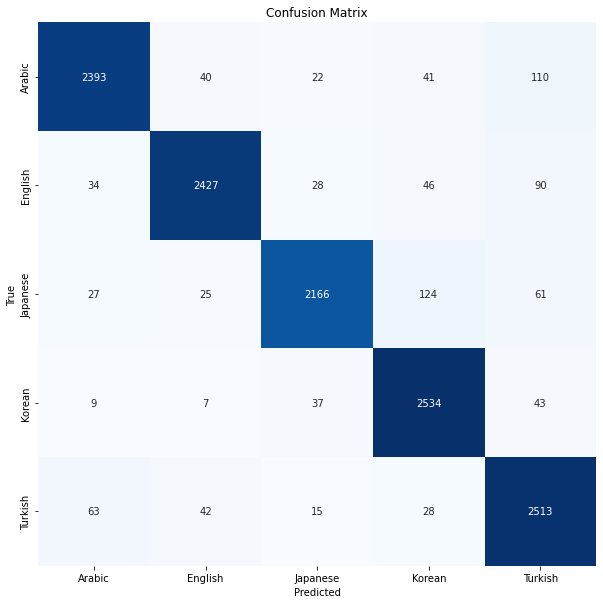

In [65]:
plt.figure(figsize = (10, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cbar=False, cmap="Blues")
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['Arabic', 'English', 'Japanese', 'Korean', 'Turkish'])
ax.yaxis.set_ticklabels(['Arabic', 'English', 'Japanese', 'Korean', 'Turkish']); 

# Model Validation (Separate Predictions)

In [66]:

def print_prediction(file_name):
    num_rows = 40 
    num_columns = max_pad_len
    num_channels = 1
    num_labels = 5
    prediction_feature = extract_features(file_name) 
    prediction_feature = prediction_feature.reshape(1, num_rows, num_columns, num_channels)

    predicted_vector = model.predict(prediction_feature, verbose=0)
    predicted_vector = to_categorical(np.argmax(predicted_vector, axis=1), num_labels)
    print(predicted_vector)
    predicted_class = ohe.inverse_transform(predicted_vector)
    print("The predicted class is:", predicted_class[0], '\n') 
    
    predicted_proba_vector = model.predict(prediction_feature, verbose=0) 
    predicted_proba = predicted_proba_vector[0]
    Labels = np.array(ohe.categories_[0])
    print('Result probability for each class:')
    for i in range(len(Labels)): 
        print(Labels[i], ": ", format(predicted_proba[i], '.8f'))


In [67]:
# English
filename = 'en.wav' 
print_prediction(filename) 

[[0. 0. 0. 0. 1.]]
The predicted class is: ['Turkish'] 

Result probability for each class:
Arabic :  0.12808888
English :  0.20594531
Japanese :  0.00045710
Korean :  0.04124434
Turkish :  0.62426442


In [68]:
# English
filename = 'en_me.wav' 
print_prediction(filename) 

[[0. 0. 1. 0. 0.]]
The predicted class is: ['Japanese'] 

Result probability for each class:
Arabic :  0.22828518
English :  0.15644225
Japanese :  0.31908435
Korean :  0.18514086
Turkish :  0.11104739


In [69]:
# Arabic
filename = 'ar.wav' 
print_prediction(filename) 

[[1. 0. 0. 0. 0.]]
The predicted class is: ['Arabic'] 

Result probability for each class:
Arabic :  0.98465848
English :  0.00268164
Japanese :  0.00254879
Korean :  0.00550372
Turkish :  0.00460728


In [70]:
# Arabic
filename = 'ar_me.wav' 
print_prediction(filename) 

[[1. 0. 0. 0. 0.]]
The predicted class is: ['Arabic'] 

Result probability for each class:
Arabic :  0.68790197
English :  0.03187776
Japanese :  0.00103060
Korean :  0.27879646
Turkish :  0.00039322


In [71]:
# Korean
filename = 'ko_me.wav' 
print_prediction(filename) 

[[0. 0. 0. 1. 0.]]
The predicted class is: ['Korean'] 

Result probability for each class:
Arabic :  0.06728132
English :  0.00976818
Japanese :  0.18734556
Korean :  0.73546141
Turkish :  0.00014350


In [72]:
# Japanese
filename = 'jp_me.wav' 
print_prediction(filename) 

[[0. 0. 0. 1. 0.]]
The predicted class is: ['Korean'] 

Result probability for each class:
Arabic :  0.20000331
English :  0.00076800
Japanese :  0.00780032
Korean :  0.78254467
Turkish :  0.00888369


# -------------------